# Jupyter Notebook for Oura Ring

## Introduction
Oura provides data that can be retrieved from their website with an API call.
There are three parameters that are available in 5 minute intervals: sleep stage, heart rate (hr) and heart rate variability (HRV). 
With this notebook you can retrieve data and load it into a Pandas df.
Then, do some simple analysis and create some graphs.

Create an account and get your credentials from the Oura Documents page: https://cloud.ouraring.com/docs

## Contents:

0. Installation and tokens
1. Sleep API call and load (some) data into Pandas df
2. Basic analysis
3. Create some graphs with it
4. Store the dataframe

## 0. Installation and tokens

In [3]:
!pip install oura

  Using cached oura-1.1.4-py2.py3-none-any.whl (11 kB)


In [2]:
from oura import OuraClient
# get your credentials from oura, see: https://cloud.ouraring.com/docs/.
# You will need a client_id, client_secret and a personal access token (PAT). 

import notebooks_config
#I store all my credentials in a notebooks_config.py file. 
#This file is then included in the .gitignore list so I can share the notebooks on GitHub.  

oura_pat = notebooks_config.oura_pat #
oura_client_id = notebooks_config.oura_client_id
oura_client_secret = notebooks_config.oura_client_secret

client = OuraClient(personal_access_token=oura_pat)
oura = OuraClient(oura_client_id, oura_client_secret, oura_pat)

## 1. Sleep API call

In [3]:
#get your personal info
oura.user_info()

{'age': 45,
 'weight': 93.0,
 'height': 180,
 'gender': 'male',
 'email': 'michiel.bontenbal@gmail.com'}

In [4]:
# Sleep Summary
result = oura.sleep_summary(start='2021-12-10', end='2021-12-11')
data = result['sleep'][0]
print(data)

{'summary_date': '2021-12-10', 'period_id': 2, 'is_longest': 1, 'timezone': 60, 'bedtime_end': '2021-12-11T07:35:58+01:00', 'bedtime_start': '2021-12-11T00:09:58+01:00', 'breath_average': 15.75, 'duration': 26760, 'total': 22890, 'awake': 3870, 'rem': 6780, 'deep': 5070, 'light': 11040, 'midpoint_time': 14670, 'efficiency': 86, 'restless': 19, 'onset_latency': 2970, 'hr_5min': [0, 71, 70, 0, 0, 72, 0, 76, 73, 72, 69, 67, 64, 65, 64, 0, 0, 0, 0, 0, 66, 66, 65, 63, 60, 0, 0, 0, 0, 61, 60, 0, 0, 61, 62, 60, 61, 61, 61, 62, 62, 64, 62, 63, 0, 61, 63, 63, 64, 63, 61, 60, 59, 0, 0, 0, 0, 0, 0, 0, 0, 56, 58, 60, 61, 63, 61, 63, 0, 59, 59, 60, 60, 60, 61, 61, 62, 61, 59, 59, 57, 59, 58, 59, 60, 61, 0, 63, 62, 62], 'hr_average': 62.52, 'hr_lowest': 56.0, 'hypnogram_5min': '424444444422222211423322221122211322221333222233322222111132223333333322211112322223333344', 'rmssd': 25, 'rmssd_5min': [0, 13, 25, 0, 0, 34, 0, 18, 13, 14, 17, 23, 27, 38, 32, 0, 0, 0, 0, 0, 13, 11, 15, 27, 42, 0, 0, 0, 0, 4

### 1a. Get the start and endtime of sleep

In [129]:
#get the start and endtime as strings
start_time = data['bedtime_start']
end_time = data['bedtime_end']
# convert strings to datetime
from dateutil import parser
start_time_dt = parser.parse(start_time)
end_time_dt = parser.parse(end_time)
print ('start time is '+ str(start_time_dt) + ' and end time is ' + str(end_time_dt))

start time is 2021-12-09 22:43:40+01:00 and end time is 2021-12-10 07:47:40+01:00


### 1b. Get the hypnogram and convert it to a list of integers

In [85]:
#get the hypnogram as one long string
hypnogram = data['hypnogram_5min']

# convert the hypnogram to a list of strings
string_list=[]
string_list[:0]=hypnogram

# convert the list of strings to a list of integers
my_stages=[] #create an empty list for the sleep stages
for i in range(len(string_list)):
    integer = int(string_list[i])
    my_stages.append(integer)
print(my_stages)

[4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 1, 1, 4, 2, 3, 3, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4]


### 1c. Get the HR and HRV for 5 min intervals

In [86]:
my_hr = data['hr_5min']
print(my_hr)

[0, 71, 70, 0, 0, 72, 0, 76, 73, 72, 69, 67, 64, 65, 64, 0, 0, 0, 0, 0, 66, 66, 65, 63, 60, 0, 0, 0, 0, 61, 60, 0, 0, 61, 62, 60, 61, 61, 61, 62, 62, 64, 62, 63, 0, 61, 63, 63, 64, 63, 61, 60, 59, 0, 0, 0, 0, 0, 0, 0, 0, 56, 58, 60, 61, 63, 61, 63, 0, 59, 59, 60, 60, 60, 61, 61, 62, 61, 59, 59, 57, 59, 58, 59, 60, 61, 0, 63, 62, 62]


In [87]:
# get the metric for heart rate variability also know as rMSSD
my_HRV = data['rmssd_5min']
print(my_HRV)

[0, 13, 25, 0, 0, 34, 0, 18, 13, 14, 17, 23, 27, 38, 32, 0, 0, 0, 0, 0, 13, 11, 15, 27, 42, 0, 0, 0, 0, 47, 26, 0, 0, 28, 22, 13, 13, 14, 13, 13, 13, 12, 25, 20, 0, 19, 14, 13, 13, 16, 28, 28, 31, 0, 0, 0, 0, 0, 0, 0, 0, 46, 28, 23, 18, 23, 29, 31, 0, 28, 35, 25, 23, 22, 25, 26, 25, 31, 33, 42, 73, 29, 35, 28, 35, 34, 0, 28, 31, 32]


### 1d. Create a list of starttime of the intervals

In [90]:
import datetime
time_change = datetime.timedelta(minutes=5)
my_startivs = [start_time_dt]
new_iv=start_time_dt
for i in range(len(my_stages)-1):
    new_iv= new_iv+time_change
    my_startivs.append(new_iv)
#print(my_startivs)
print('done')

done


### 1e. Creating a df and adding the lists to it

In [91]:
#see if all lists have same length
print(len(my_stages), len(my_hr), len(my_HRV), len(my_startivs))

90 90 90 90


In [92]:
# create an empty dataframe
import pandas as pd
sleep_df = pd.DataFrame()

# Add the lists to the dataframe
sleep_df['Start_time']=my_startivs
sleep_df['Stage']= my_stages
sleep_df['hr']=my_hr
sleep_df['HRV']=my_HRV
sleep_df

,Start_time,Stage,hr,HRV
0,2021-12-11 00:09:58+01:00,4,0,0
1,2021-12-11 00:14:58+01:00,2,71,13
2,2021-12-11 00:19:58+01:00,4,70,25
3,2021-12-11 00:24:58+01:00,4,0,0
4,2021-12-11 00:29:58+01:00,4,0,0
...,...,...,...,...
85,2021-12-11 07:14:58+01:00,3,61,34
86,2021-12-11 07:19:58+01:00,3,0,0
87,2021-12-11 07:24:58+01:00,3,63,28
88,2021-12-11 07:29:58+01:00,4,62,31


In [14]:
sleep_df.dtypes

Start_time    datetime64[ns, tzoffset(None, 3600)]
Stage                                        int64
hr                                           int64
HRV                                          int64
dtype: object

In [93]:
# replace 0's with NaN
import numpy as np
sleep_df = sleep_df.replace(0, np.NaN)
sleep_df.tail()

,Start_time,Stage,hr,HRV
85,2021-12-11 07:14:58+01:00,3,61.0,34.0
86,2021-12-11 07:19:58+01:00,3,NaN,NaN
87,2021-12-11 07:24:58+01:00,3,63.0,28.0
88,2021-12-11 07:29:58+01:00,4,62.0,31.0
89,2021-12-11 07:34:58+01:00,4,62.0,32.0


In [94]:
sleep_df.describe()

,Stage,hr,HRV
count,90.000000,64.000000,64.000000
mean,2.366667,62.515625,25.328125
std,0.917373,3.980078,10.873084
min,1.000000,56.000000,11.000000
25%,2.000000,60.000000,15.750000
50%,2.000000,61.000000,25.000000
75%,3.000000,63.250000,31.000000
max,4.000000,76.000000,73.000000


## 2. Do some basic analysis

In [95]:
hr_mean =sleep_df['hr'].mean()
HRV_mean=sleep_df['HRV'].mean()
print('Average hr is: ' + str(round(hr_mean,1))+ ' and average HRV is ' + str(round(HRV_mean,1)))

Average hr is: 62.5 and average HRV is 25.3


In [96]:
hr_min =sleep_df['hr'].min()
HRV_min=sleep_df['HRV'].min()
print('Lowest hr is: ' + str(round(hr_min,1))+ ' and Lowest HRV is ' + str(round(HRV_min,1)))

Lowest hr is: 56.0 and Lowest HRV is 11.0


In [97]:
hr_max =sleep_df['hr'].max()
HRV_max=sleep_df['HRV'].max()
print('Highest hr is: ' + str(round(hr_max,1))+ ' and highest HRV is ' + str(round(HRV_max,1)))

Highest hr is: 76.0 and highest HRV is 73.0


In [98]:
hr_median =sleep_df['hr'].median()
HRV_median=sleep_df['HRV'].median()
print('Median hr is: ' + str(round(hr_median,1))+ ' and median HRV is ' + str(round(HRV_median,1)))

Median hr is: 61.0 and median HRV is 25.0


In [101]:
deep_sleep = my_stages.count(1)
deep_sleep_perc= round((deep_sleep/len(my_stages)*100),2)
print('Deep sleep was ' + str(deep_sleep*5) + ' minutes. That is ' + str(deep_sleep_perc)+ ' % of the time.')

Deep sleep was 75 minutes. That is 16.67 % of the time.


## 3. Create graphs

In [100]:
my_counts = sleep_df['Stage'].value_counts()
my_counts

2    39
3    24
1    15
4    12
Name: Stage, dtype: int64

<AxesSubplot:title={'center':'stages'}, ylabel='Frequency'>

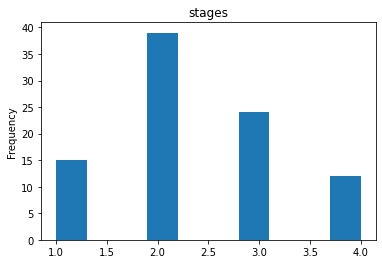

In [102]:
# for a histogram use this pattern: name_df['column'].plot.hist(title='Genome Size Histogram')
sleep_df['Stage'].plot.hist(title='stages')

<AxesSubplot:xlabel='Start_time', ylabel='hr'>

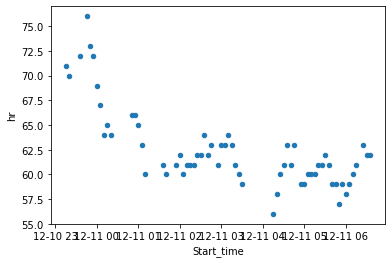

In [103]:
sleep_df.plot.scatter(x='Start_time', y='hr', s=None, c=None)

<AxesSubplot:xlabel='Start_time', ylabel='HRV'>

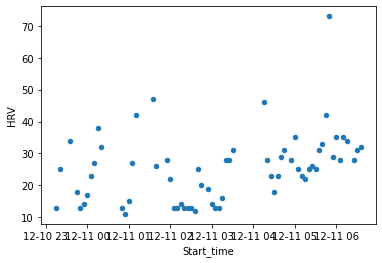

In [104]:
sleep_df.plot.scatter(x='Start_time', y='HRV', s=None, c=None)

<AxesSubplot:xlabel='Start_time', ylabel='Stage'>

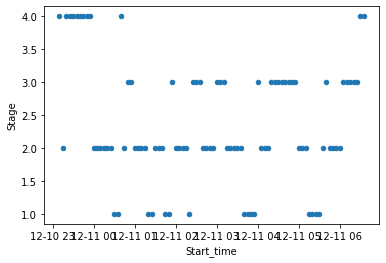

In [105]:
sleep_df.plot.scatter(x='Start_time', y='Stage', s=None, c=None)

## 4. Store df as csv

In [106]:
#naming pattern: 
sleep_df.to_csv('sleep_df_oura_202112010-11.csv')